In [366]:
#Importing Important Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

### Loading Data


In [367]:
#Loading our Dataset
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [368]:
#Viewing shape
df1.shape

(13320, 9)

Here we have loaded the dataset of Bengaluru House Prices. We can see that it has total of 13320 rows and 9 columns.

In [369]:
#Columns in the dataset
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [370]:
#Viewing unique area type
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

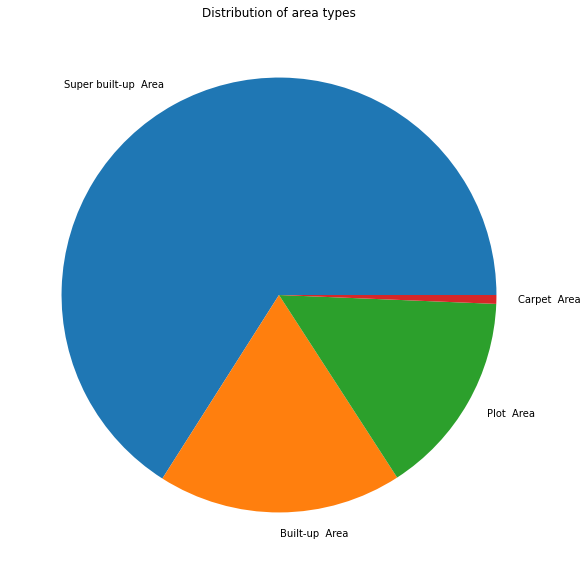

In [371]:
area_counts = df1["area_type"].value_counts().to_dict()

# create a pie chart of the value counts
plt.pie(area_counts.values(), labels=area_counts.keys())

# add a title to the chart
plt.title("Distribution of area types")
# display the chart
plt.show()

In [372]:
#Viewing the number of unique area_types
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [373]:
df1=df1[df1['area_type']!="Carpet  Area"]

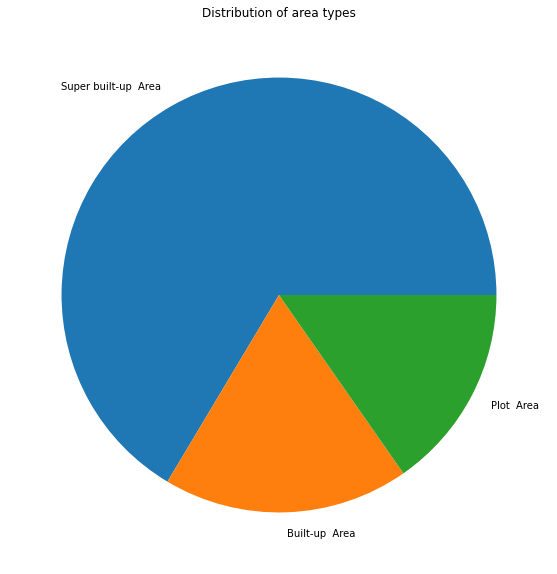

In [374]:
area_counts = df1["area_type"].value_counts().to_dict()

# create a pie chart of the value counts
plt.pie(area_counts.values(), labels=area_counts.keys())

# add a title to the chart
plt.title("Distribution of area types")
# display the chart
plt.show()

In [375]:
#Viewing unique balcony
df1['balcony'].unique()


array([ 1.,  3., nan,  2.,  0.])

In [376]:
#Viewing the number of unique balcony
df1['balcony'].value_counts()

2.0    5093
1.0    4864
3.0    1658
0.0    1014
Name: balcony, dtype: int64

Some features like availability, balcony etc. are not needed to make our predictions therefore we will drop them.

In [377]:
#Dropping unnecessary columns
df2 = df1.drop([ 'society' , 'balcony' , 'availability'] , axis = 'columns')
df2.shape

(13233, 6)

Now we are left with 6 columns only.

### Data Cleaning

Now we will look into our data for missing values, if there are missing values we will fill them.

In [378]:
#Viewing rows with missing values
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [379]:
#Dropping rows with missing values
df3 = df2.dropna()

In [380]:
#Viewing df3 for missing values
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now we can see that there are no missing values in our dataset.

In [381]:
df3.shape

(13159, 6)

Now our our dataset has 13246 rows because we dropped some rows with missing values.

### Feature Engineering

**Size**

In [382]:
# unique values in Size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [383]:
#Creating a new column bhk
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ashiq\AppData\Local\Temp/ipykernel_38228/2117760272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [384]:
#Viewing unique values of bhk
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

Now we can see that we only have numbers for each bhk. Here we can see that some houses have a lot of rooms let's see them.

In [385]:
df3[df3['bhk']>20]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Here see that the bedroom having 43 rooms have only 2400 sqft of area, which is quite unusual.We will solve this problem.

**total_sqft**

In [386]:
#Viewing unique values in total_sqft column
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here we can see that some values in total_sqft are like  1133 - 1384 which is not good  we will solve this problem.

In [387]:
# Defining is_float function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [388]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Here we can see those total_sqft values that have a range 3067 - 8156 or units with them 34.46Sq. Meter. We don't need these values we just want simply numbers.
The values that have range we will take their average and the values that have units with them, we will drop those values.


In [389]:
#Defining a function to convert the range values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
    

In [390]:
#Checking convert_sqft_to_num function
convert_sqft_to_num('1015 - 1540')

1277.5

In [391]:
#Applying convert_sqft_to_num
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]


In [392]:
#Checking whether it worked
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

Before, row 30 had 	2100 - 2850 total_sqft but now it has 2475.0 which is the average of 2100 and 2850.

**Price Per Square Feet**

In [393]:
#Creating Price Per square Feet Column
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [394]:
df5['area_type'].value_counts()

Super built-up  Area    8729
Built-up  Area          2394
Plot  Area              1991
Name: area_type, dtype: int64

In [395]:
#ordinal encoding area_type
#df5=df5.replace({'area_type':{'Super built-up Area':2,'Plot Area':1,'Built-up Area':3,'Carpet  Area':4}})
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df5['area_type'] = encoder.fit_transform(df5[['area_type']])

In [396]:
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,2.0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1.0,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,0.0,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,2.0,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2.0,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Location**

In [397]:
#Viewing the number of location datapoints 
df5['location'] = df5['location'].apply(lambda x : x.strip())
location_stats = df5['location'].value_counts(ascending = False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               258
Thanisandra                  235
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
Indiranagar HAL 2nd Stage      1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1283, dtype: int64

We can see that there are locations having 533 data points or even 1 data points. 

Now we will mark the locations that have less than or equal to 150 data points as other.

In [398]:
#Locations having less than or equal to 150 data points
location_stats_less_than_150 = location_stats[location_stats<= 150]
location_stats_less_than_150

Hennur Road                  150
Bannerghatta Road            149
7th Phase JP Nagar           148
Haralur Road                 141
Electronic City Phase II     130
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
Indiranagar HAL 2nd Stage      1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1273, dtype: int64

In [399]:
#location unique data points
len(df5['location'].unique())

1283

There are 12 total location data points.

In [400]:
#removing location data points less than or equal to 150
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_150 else x)
len(df5['location'].unique())

11

Now  we have only 12 location data points left.

### Outlier Removal

**tatal_sqft / bhk**

we will assume that 1 bhk = 300 sqft. If some values do not satisfy this condition we will remove those rows from our dataset.

In [401]:
#Viewing tatal_sqft / bhk <300
df5[df5['total_sqft'] / df5['bhk'] < 250]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,1.0,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,1.0,other,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,1.0,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,1.0,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,1.0,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13221,1.0,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260
13277,1.0,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,1.0,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13303,1.0,other,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [402]:
sorted_df = df5.sort_values('price_per_sqft')
sorted_df.head(5)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1894,1.0,other,3 Bedroom,52272.0,2.0,140.0,3,267.829813
674,0.0,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371.428571
5393,2.0,other,9 BHK,42000.0,8.0,175.0,9,416.666667
11748,0.0,other,3 BHK,2400.0,3.0,12.0,3,500.000000
7242,1.0,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573.921028


In [403]:
df5.shape

(13114, 8)

we originally had 13200 rows in our dataset.

In [404]:
#removing outliers 
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 250)]
df6.shape

(12504, 8)

After removing the outlier we are left with 12456 rows only.

**price_per_sqft**

In [405]:
#Describing price_per_sqft
df6['price_per_sqft'].describe()

count     12504.000000
mean       6349.116918
std        4205.711132
min         267.829813
25%        4210.526316
50%        5300.191410
75%        6961.044565
max      176470.588235
Name: price_per_sqft, dtype: float64

If we look at the min and max values. The minimum price is 267 only for a sqft which is very unusual for a metro city like Bengalure. The maximum price of 176470 per sqft is also very unusual. We will remove these type of extreme values, by using mean and standard deviation.

In [406]:
#Function for removing extreme values
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [407]:
#Calling remove_pps_outliers 
df7 = remove_pps_outliers(df6)
df7.shape

(11101, 8)

(array([ 431., 1531., 2499., 2479., 1642., 1097.,  657.,  345.,  234.,
         186.]),
 array([ 2064.22018349,  2961.91895784,  3859.61773219,  4757.31650655,
         5655.0152809 ,  6552.71405525,  7450.41282961,  8348.11160396,
         9245.81037831, 10143.50915267, 11041.20792702]),
 <BarContainer object of 10 artists>)

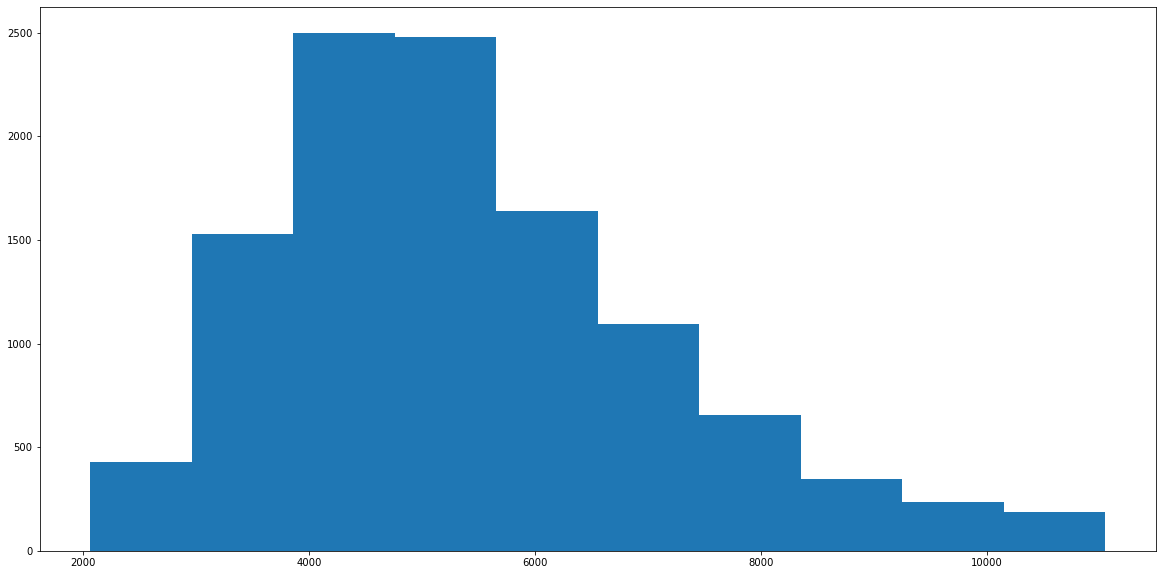

In [411]:
#bins=np.linspace(df7['price_per_sqft'].min(),df7['price_per_sqft'].max(),10)
plt.hist(df7['price_per_sqft'])

Text(0, 0.5, 'Count')

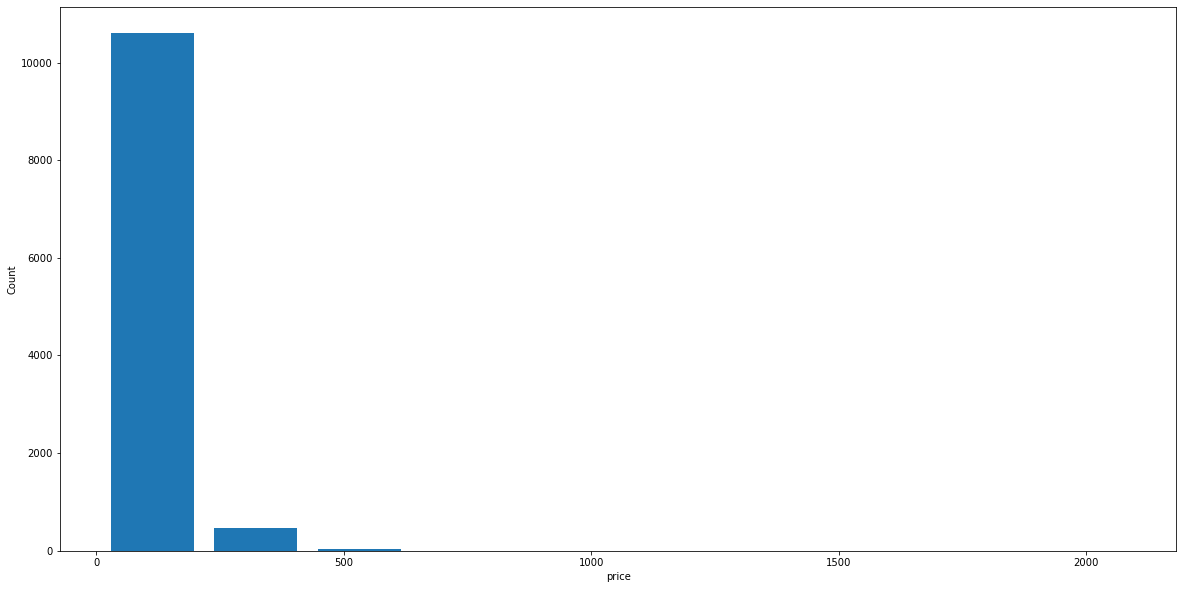

In [321]:
plt.hist(df7.price, rwidth = 0.8)
plt.xlabel('price')
plt.ylabel('Count')

In [322]:
df7=df7[df7['price']<=750]

Text(0, 0.5, 'Count')

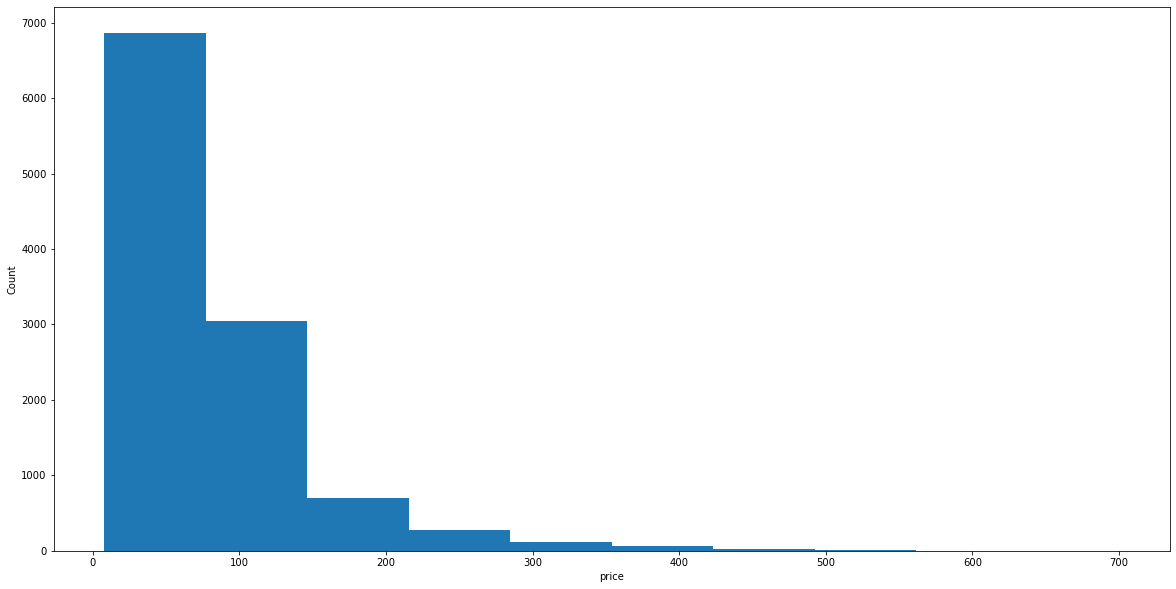

In [323]:
plt.hist(df7.price)
plt.xlabel('price')
plt.ylabel('Count')

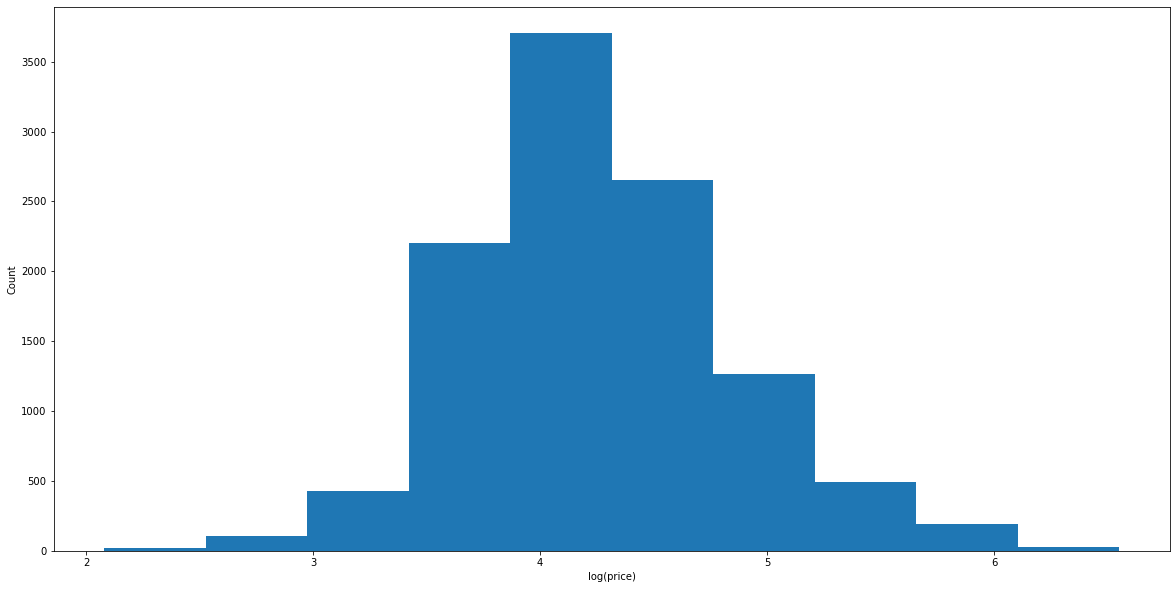

In [324]:
# Apply log transform to price column
df7['price_log'] = np.log(df7['price'])

# Plot histogram of log-transformed price
plt.hist(df7['price_log'])
plt.xlabel('log(price)')
plt.ylabel('Count')
plt.show()

In [325]:
df7.drop('price_log',axis="columns",inplace=True)
df7.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,2.0,Electronic City,2 BHK,660.0,1.0,23.10,2,3500.000000
1,2.0,Electronic City,3 BHK,1025.0,2.0,47.00,3,4585.365854
2,2.0,Electronic City,2 BHK,1000.0,2.0,28.88,2,2888.000000
3,2.0,Electronic City,3 BHK,1530.0,2.0,45.90,3,3000.000000
4,2.0,Electronic City,3 BHK,1500.0,2.0,64.50,3,4300.000000


In [326]:
import re

ff=df7[df7['location'].str.contains(r'bannerghatta road',regex=True,flags=re.IGNORECASE)]
ff

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft


**BHK's outliers**

If we look carefully in our dataset, we can see that the values of some 2 and 3 bhk houses are very unusual. Like a 2 bhk and a 3 bhk houses are in the same location but their price differs a lot. We will solve this problem.

In [327]:
# Creating a Scatter plot function 
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location ) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) & (df.bhk == 3)]
    bhk1 = df[(df.location == location ) & (df.bhk == 1)]

    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,  color = 'green' , label = '3 BHK' , s = 50)
    plt.scatter(bhk1.total_sqft , bhk1.price , marker = '*' ,  color = 'red' , label = '1 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title('Location')
    plt.legend()
    
    

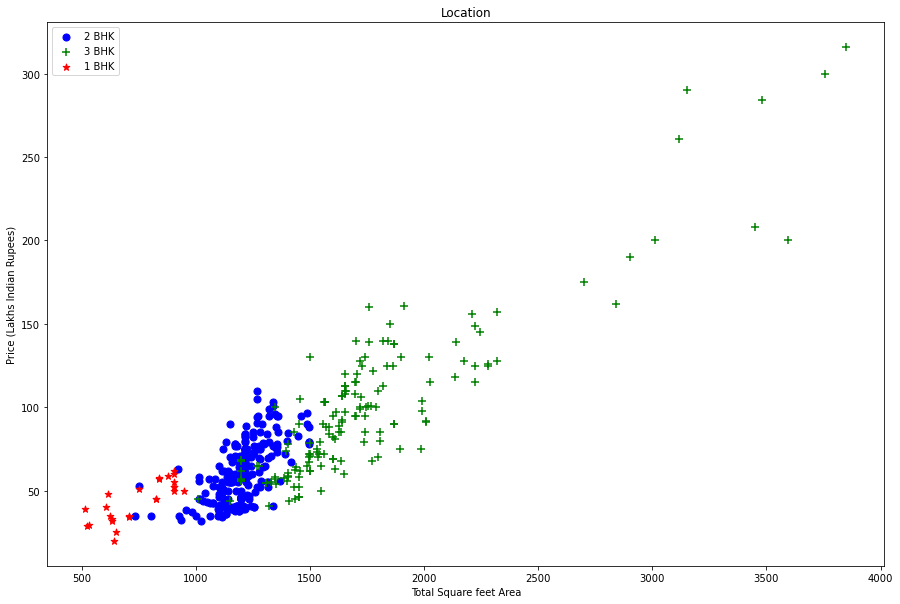

In [328]:
#Calling plot_scatter_chart
plot_scatter_chart(df7 , 'Whitefield')

In the scatterplot above the blue points are the 2 bhk houses and the green points are the 3 bhk houses. we can see for example around 1500 Total Square feet Area that some 2bhk houses have more price than the 3 bhk houses. we will remove this abnormality.

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**




{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}



**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [329]:
# Creating remove_bhk_outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            #stats1 = bhk_stats.get(bhk+1)
            if (stats and stats['count']>5):# or (stats1 and stats1['count']>5)
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                #exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft > (stats1['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')
    

In [330]:
#Calling remove_bhk_outliers
df8 = remove_bhk_outliers(df7)
df8.shape

(6099, 8)

In [331]:
ff1=remove_bhk_outliers(ff)
ff1.shape

(0, 8)

In [332]:
df8['bhk'].unique()

array([ 3,  2,  1,  4,  8,  6,  9,  5, 11,  7, 27, 10, 16, 13],
      dtype=int64)

Now let's check if our remove_bhk_outliers function really work.

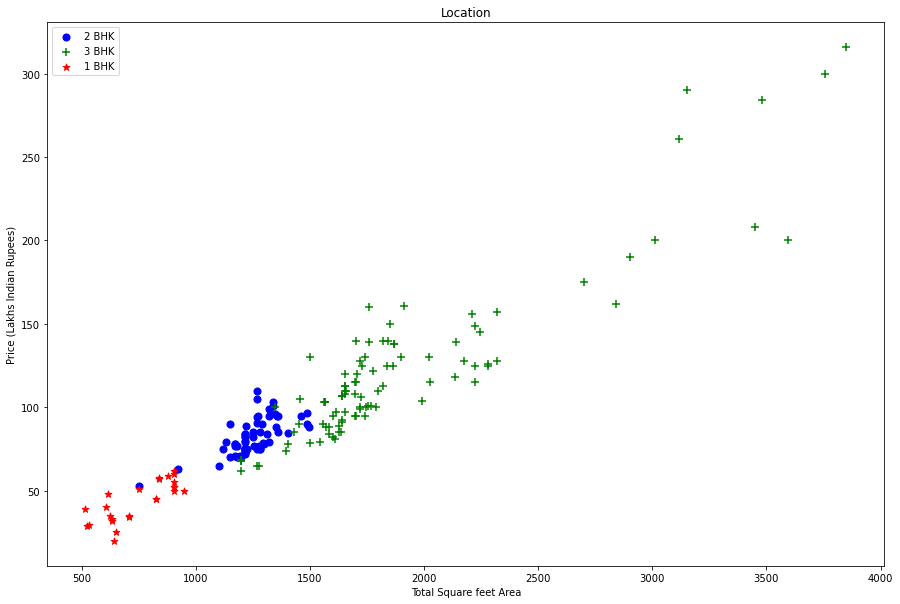

In [333]:
plot_scatter_chart(df8 , 'Whitefield')

Now we can see that the price of the 2 bhk houses is less than the price of the 3 bhk houses.

Text(0, 0.5, 'Count')

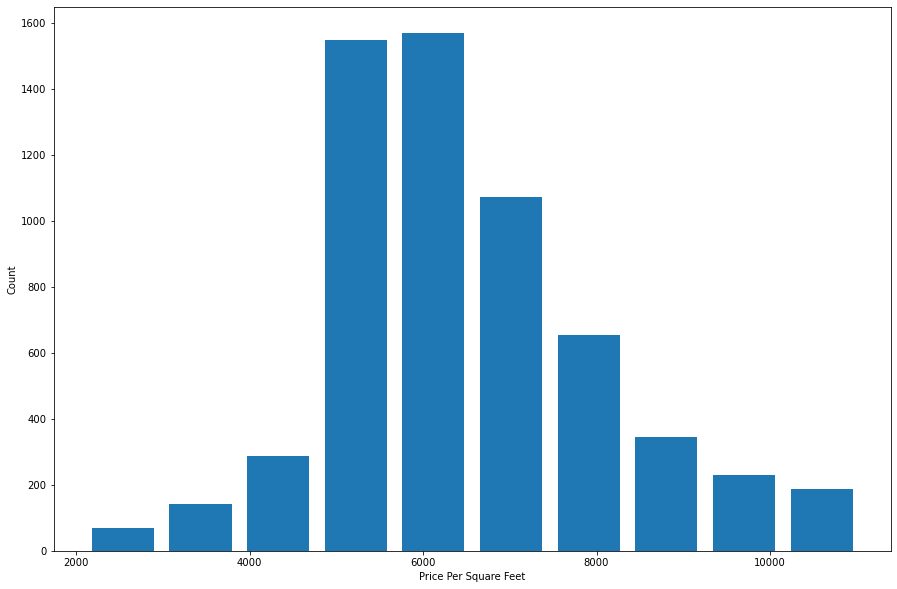

In [334]:
#Plotting a histogram of price_per_sqft
plt.hist(df8.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

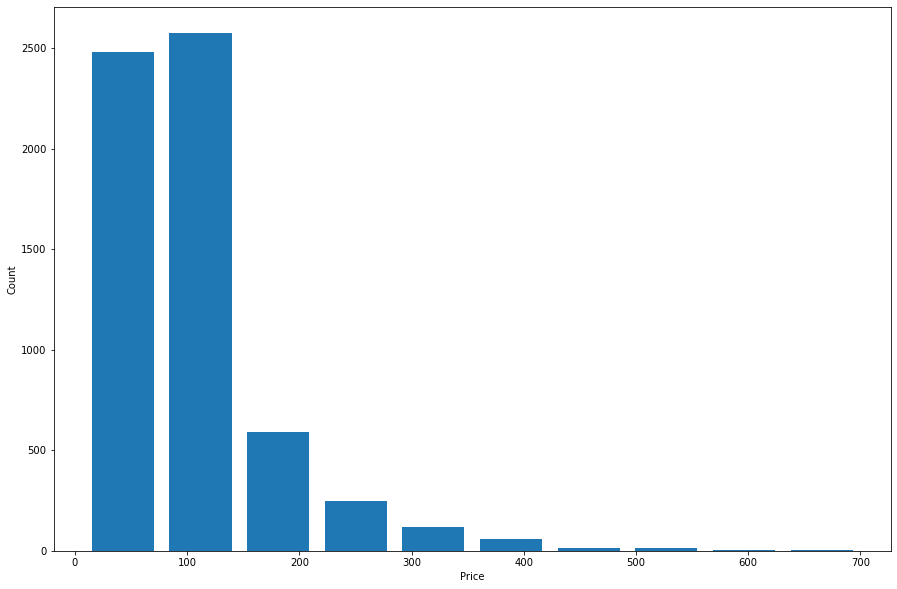

In [335]:
#Plotting a histogram of price
plt.hist(df8.price , rwidth = 0.8)
plt.xlabel('Price')
plt.ylabel('Count') 

We can see from the histogram that our dataset has almost a normal distribution.

**Bathroom**

Text(0, 0.5, 'Count')

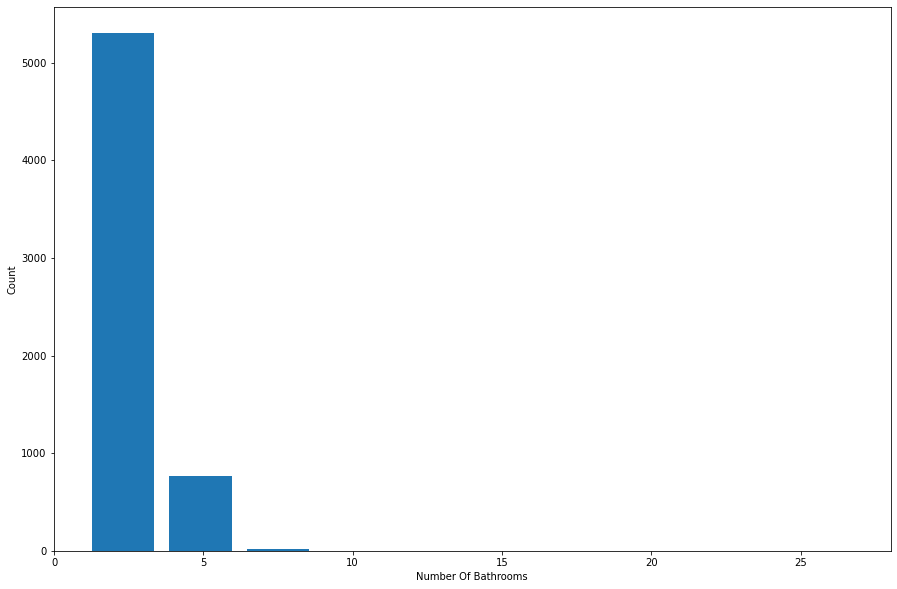

In [336]:
#Plotting a histogram showing bathrooms
plt.hist(df8['bath'] , rwidth = 0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

We can see that most of the houses in our dataset has 2,4 or 5 bathrooms.

In [337]:
#Viewing unique bathroom values
df8['bath'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  8.,  9.,  7., 27., 12., 16., 13.])

we can see that some houses even has 13 or 16 bathrooms.

In [338]:
#Houses having more than 10 bathrooms
df8[df8['bath'] > 10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
3348,2.0,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
4311,2.0,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
4658,2.0,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7512,2.0,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8833,2.0,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Let's suppose that we have a 2bhk house and it has 5 bathrooms, it will be very unusual for a house in Bengaluru. To remove these kind of outliers we will assume a condition that a 1 bhk house can have atmost 3 bathrooms. 

In [339]:
#House not satisfying our condition
df8[df8.bath > (df8.bhk+2)]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1366,2.0,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9776,0.0,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


We will keep the hourses that satisfy our condition.

In [340]:
#Removing houses not satisfying our condition
df9 = df8[df8.bath< df8.bhk+2]
df9.shape

(6032, 8)

In [341]:
df9.dtypes

area_type         float64
location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [342]:
df9['bath'] = df9['bath'].astype(int)


C:\Users\ashiq\AppData\Local\Temp/ipykernel_38228/577735911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['bath'] = df9['bath'].astype(int)


Text(0, 0.5, 'Count')

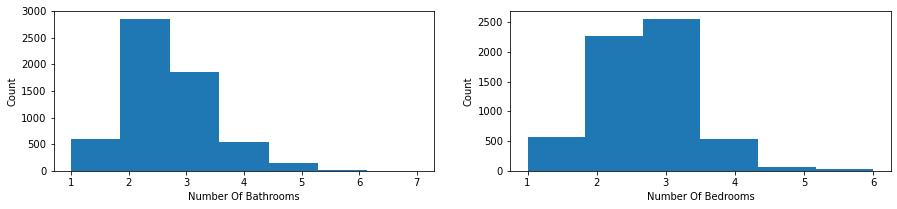

In [343]:
df9=df9[df9.bath<8]
df9=df9[df9.bhk<7]
#removing bhk and bath outliers
#Plotting a histogram showing bathrooms
plt.subplot(3,2,1)
plt.hist(df9['bath'],bins=7 )
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

plt.subplot(3,2,2)
plt.hist(df9['bhk'],bins=6 )
plt.xlabel('Number Of Bedrooms')
plt.ylabel('Count')

In our dataset we have a size column , but we have already bhk column. Also the price_per_sqft column was created to remove outliers. Now we have no use of size and price_per_sqft columns, therefore we will drop them.

In [344]:
#Dropping size and price_per_sqft
df10 = df9.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df10.head()

,area_type,location,total_sqft,bath,price,bhk
1,2.0,Electronic City,1025.0,2,47.0,3
4,2.0,Electronic City,1500.0,2,64.5,3
5,0.0,Electronic City,1060.0,2,60.0,2
6,2.0,Electronic City,1152.0,2,64.5,2
8,0.0,Electronic City,770.0,1,36.0,2


In [437]:
grouped_data = df10.groupby('location')['price']
mean_price = grouped_data.mean()
median_price = grouped_data.median()


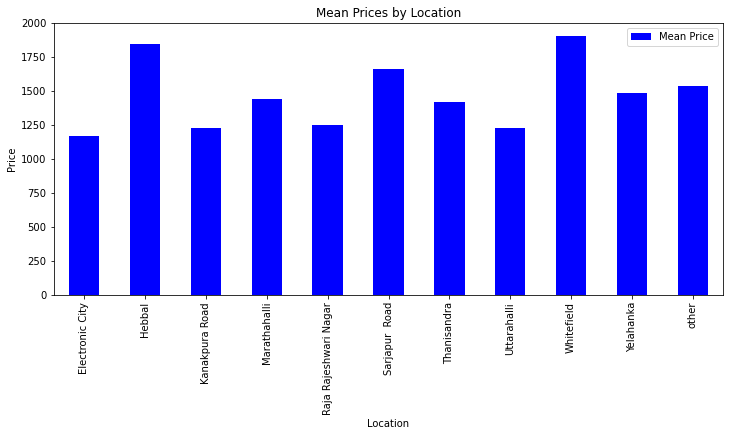

In [438]:
plt.figure(figsize=(12, 5))
mean_price.plot(kind='bar', color='blue', label='Mean Price')
#median_price.plot(kind='bar', color='blue', label='Median Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Mean Prices by Location')
plt.legend()
plt.show()

### One - Hot Encoding

In our dataset we have location column which is not numeric we know that our machine learning models work on numeric data only.We will convert the data in location column to numeric data using one - hot encoding.

In [345]:
#One- hot encoding
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,Electronic City,Hebbal,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0


We can see in the above DataFrame that our locations data is in numeric form.

#### Combining df10 and dummies
df11 = pd.concat([df10 , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df11.head()

In [346]:
df11 = pd.concat([df10 , dummies] , axis = 'columns') 
df11.head()

,area_type,location,total_sqft,bath,price,bhk,Electronic City,Hebbal,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
1,2.0,Electronic City,1025.0,2,47.0,3,1,0,0,0,0,0,0,0,0,0,0
4,2.0,Electronic City,1500.0,2,64.5,3,1,0,0,0,0,0,0,0,0,0,0
5,0.0,Electronic City,1060.0,2,60.0,2,1,0,0,0,0,0,0,0,0,0,0
6,2.0,Electronic City,1152.0,2,64.5,2,1,0,0,0,0,0,0,0,0,0,0
8,0.0,Electronic City,770.0,1,36.0,2,1,0,0,0,0,0,0,0,0,0,0


In [347]:
#Dropping location column
df12 = df11.drop('location' , axis = 'columns')
df12.head()

,area_type,total_sqft,bath,price,bhk,Electronic City,Hebbal,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
1,2.0,1025.0,2,47.0,3,1,0,0,0,0,0,0,0,0,0,0
4,2.0,1500.0,2,64.5,3,1,0,0,0,0,0,0,0,0,0,0
5,0.0,1060.0,2,60.0,2,1,0,0,0,0,0,0,0,0,0,0
6,2.0,1152.0,2,64.5,2,1,0,0,0,0,0,0,0,0,0,0
8,0.0,770.0,1,36.0,2,1,0,0,0,0,0,0,0,0,0,0


In [348]:
df12['area_type'].value_counts()

2.0    4287
0.0    1078
1.0     643
Name: area_type, dtype: int64

In [350]:
#Dropping price column
df12.to_csv("processed_data.csv", index=False)
